# Coding a Neural Network for Classification

După ce ne-am creat datele cu care lucrăm pe parcursul acestei secțiuni, le-am vizualizat, le-am transformat și le-am împărțit în date de antrenare și date de testare urmează partea în care ne creem un model de Deep Learning prin care să rezolvăm această problemă a clasificării. Înainte de asta trebuie să ne recreem datele necesare

In [15]:
# importing the libraries
import torch
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [16]:
# creating the dataset using Scikit-Learn

X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [17]:
# creating a Pandas DataFrame with all the data
df = pd.DataFrame({"X1": X[:, 0],
                   "X2": X[:, 1],
                   "label": y})

df.head()

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

<Axes: xlabel='X1', ylabel='X2'>

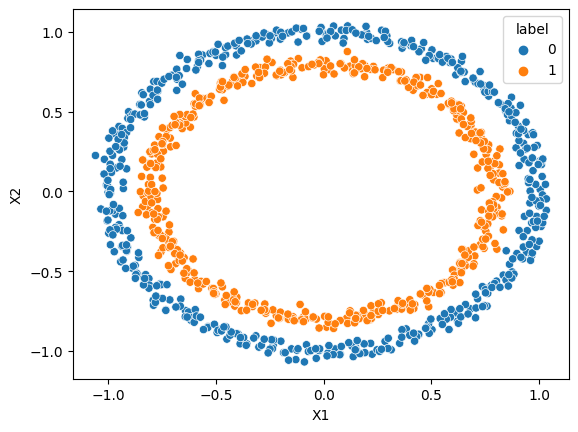

In [18]:
sns.scatterplot(data=df, x="X1", y="X2", hue="label")

In [19]:
# transform the data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [20]:
# split the data to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Acum că avem toate datele în formatul în care avem nevoie urmează partea în care o să ne creem un model de Deep Learning pentru clasificare. O să scriem o serie de pași pe care trebuie să îi urmăm pentru a ne crea modelul respectiv.

1. O să ne creem o clasă (care o să reprezinte modelul în sine), clasă care o să moștenească modulul `nn.Module`

2. Înn cadrul acestui model o să ne creem două layere `nn.Linear()` prin care să putem să procesăm datele pe care le avem

3. Rescrierea metodei `forward()` în cadrul căreia se face computația

4. Instanțierea unui model

In [21]:
from torch import nn

In [22]:
class CircleModel(nn.Module):
    # almost all models should inherite from nn.Module
    # overwrite the __init__ method
    def __init__(self):
        super().__init__()

        # creating the 2 Linear layers
        self.linear_layer1 = nn.Linear(in_features=2, out_features=5)
        self.linear_layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        # overwritting the forward method
        return self.linear_layer2(self.linear_layer1(x))

Codul pentru a crea un model de clasificare de Deep Learning pentru datele cu care lucrăm arată așa. În continuare o să explicăm codul pentru a putea avea o mai bună înțelegere a acestuia și de ce anume a fost structurat în acest fel. După cum spuneam am decis să creem un model care să conțină două layere, aceste layere fiind de tipul `nn.Linear()`. După cum știm **nn.Linear()** are doi parametrii importanți pe care trebuie să îi specificăm și anume *in_features* și *out_features*. Pentru primul layer la parametrul de *in_features* specificăm numărul total de features care intră în acest model de Deep Learning. Numărul care intră este reprezentat de numărul total de features din X (care este 2).

În ceea ce privește partea de *out_features* aici îi spune modelului ca din cele două features care intră în acest layer, câte features să returneze (pentru cazul de mai sus o să returneze 5 features). Prin urmare, din două features ce le avem, rețeaua neuronală o să ne facă cinci features în cel de al doilea layer. Cu cât numărul de features este mai mare, cu atât un model poate să învețe mai ușor ce pattern-uri există în aceste date și să facă predicții mai bune. Numărul de features care iese dintr-un layer este stabilit de către programator, iar de obicei acesta este o putere de a lui 8, deoarece computația se face mult mai bine pentru astfel de numere. Deși am zis că dintr-un număr mai mare de features modelul poate să învețe mai bine, nu este bine nici să se exagereze cu acest valori.

În ceea ce privește cel de al doilea layer (**nn.Linear()**) valoarea pentru *in_features* trebuie să fie identică cu valoarea de la *out_features* pe care o are primul layer. Din primul layer am zis că o să se returneze 5 features, prin urmare acum layer-ul următor trebuie să se ocupe de procesarea a acestor 5 features. Ca și output (acesta fiind layer-ul final) aici o să returneze o singură valoare, deoarece acesta este un model de clasificare binar, prin urmare o singură valoare trebuie să fie returnată. Rețeaua neuronnală o să arate așa:

<img src="../SS/section_03_image_05.png" width=700>

Ca și input în cadrul acestei rețele neuronale avem două features (X1 și X2) și după cum spuneam o să avem două hidden layers care o să reprezinte două layere de tipul `nn.Linear()`. Primul layer o să aibă ca și input acele două features X1 și X2, iar ca și output o să aibă 5 features (cele cu albastru din imaginea de mai sus). Al doile layer o să aibă ca și input aceste 5 noi features create de către layer-ul `nn.Linear()`, iar ca și output o să fie o singură valoare, și anume clasa din care face parte acel element.

Referitor la metoda `forward()`, aici este un pic diferit ceea ce se returnează deoarece avem de-a face cu două layere, prin urmare trebuie să le apelăm cumva pe ambele. Apelăm prima dată **self.linear_layer2()** care returnează predicția modelului, iar în cadrul acestei metode de Linear Regressionn trebuie să apelăm primul layer al acestui model de Deep Learning. De ce anume trebuie să apelăm un layer în cadrul altui layer? Deoarece ultimul layer are ca și input 5 features, iar noi modelului o să îi oferim ca și input doar două features, primul dintre leyerele modelului ocupându-se cu transformarea din două features în cinci.

După ce am creat acest cod pentru modelul respectiv, acum putem să ne creem o instanță a modelului pentru a vedea din ce este acesta alcătuit.

In [23]:
# create an instance of a model
torch.manual_seed(42)
model_02 = CircleModel()

In [24]:
model_02

CircleModel(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

După cum se poate observa, modelul respectiv este creat din două layere liniare, explicându-se la fiecare dintre ele câte features intră în cadrul acelui layer și câte ies.

## Recapitulare

În cadrul acestei lecții am învățat următoarele:

1. Cum să creem două layere de tip Linear Regression într-un model
```python
class CircleModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.linear_layer1 = nn.Linear(in_features=2, out_features=5)
        self.linear_layer2 = nn.Linear(in_features=5, out_features=1)
```

2. Cum se realizează computația în metoda *forward()* pentru un astfel de model cu două layere
```python
class CircleModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.linear_layer1 = nn.Linear(in_features=2, out_features=5)
        self.linear_layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.linear_layer2(self.linear_layer1(x))
```